# Introduction

- This project uses the most popular **classification techniques** to predict the outcomes after an extensive **EDA** and work **missing values, and imbalance in data.**
- This project has two parts.
  - Part 1 - Predicting the condition of the patient depending on the received test results on biomechanics features of the patients according to their current conditions.
  - Part 2 - Build an AIML model to perform focused marketing by predicting the potential customers who will convert using the historical database.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %%HTML
# <script src="require.js"></script>

In [ ]:
# import plotly.io as pio
# pio.renderers.default = "notebook_connected"

# https://community.plotly.com/t/plotly-graph-not-showing-up-in-rendered-html/72739
# https://stackoverflow.com/questions/66210187/exporting-jupyter-notebook-with-plotly-to-html-not-displaying-correctly-when-off

# Part A

## 1. Data Understanding

### A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [ ]:
d1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_Data/Normal.csv")
d2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_Data/Type_H.csv")
d3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_Data/Type_S.csv")

### B. Print Shape and columns of all the 3 DataFrames.

In [ ]:
print("Shape : ")
print(f" d1 : {d1.shape} \n d2 : {d2.shape} \n d3 : {d3.shape}")

print("\nColumns : \n")
print(f" d1 : {d1.columns} \n d2 : {d2.columns} \n d3 : {d3.columns}")

Shape : 
 d1 : (100, 7) 
 d2 : (60, 7) 
 d3 : (150, 7)

Columns : 

 d1 : Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object') 
 d2 : Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object') 
 d3 : Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


### C. Compare Column names of all the 3 DataFrames and clearly write observations

In [ ]:
if d1.columns.sort_values().equals(d2.columns.sort_values()) :
  print("The columns of first two data frames are same.")

if d2.columns.sort_values().equals(d3.columns.sort_values()) :
  print("The columns of last two data frames are same.")

The columns of first two data frames are same.
The columns of last two data frames are same.


In [ ]:
if d1.dtypes.sort_index().equals(d2.dtypes.sort_index()):
  print("The column data types of first two data frames are same.")

if d2.dtypes.sort_index().equals(d3.dtypes.sort_index()):
  print("The column data types of last two data frames are same.")

The column data types of first two data frames are same.
The column data types of last two data frames are same.


### D. Print DataTypes of all the 3 DataFrames

In [ ]:
print("\nTypes : \n")
print(f" d1 : {d1.dtypes} \n d2 : {d2.dtypes} \n d3 : {d3.dtypes}")


Types : 

 d1 : P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object 
 d2 : P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object 
 d3 : P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


### E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames

In [ ]:
print("Unique values in Class column of all three data sets: \n")
print(f" d1: {d1.Class.unique()} \n d2: {d2.Class.unique()} \n d3: {d3.Class.unique()}")

Unique values in Class column of all three data sets: 

 d1: ['Normal' 'Nrmal'] 
 d2: ['Type_H' 'type_h'] 
 d3: ['Type_S' 'tp_s']


Each data set has a single class for the the records in the data set.
But the same class is refered by 2 names, in each data set.  

## 2. Data Preparation and Exploration

### A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [ ]:
d1.Class = 'normal'
d2.Class = 'type_h'
d3.Class = 'type_s'
print(f" d1: {d1.Class.unique()} \n d2: {d2.Class.unique()} \n d3: {d3.Class.unique()}")

 d1: ['normal'] 
 d2: ['type_h'] 
 d3: ['type_s']


### B. Combine all the 3 DataFrames to form a single DataFrame

In [ ]:
d = pd.concat([d1,d2,d3])
d.reset_index(inplace=True, drop=True)
d.shape

(310, 7)

### C. Print 5 random samples of this DataFrame

In [ ]:
d.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
237,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,type_s
196,96.657315,19.461581,90.211498,77.195734,120.673041,64.080998,type_s
29,56.447026,19.444499,43.577846,37.002527,139.189690,-1.859689,normal
239,85.095503,21.069897,91.734792,64.025606,109.062312,38.032831,type_s
26,61.821627,13.597105,64.000000,48.224523,121.779803,1.296191,normal


### D. Print Feature-wise percentage of Null values

In [ ]:
d.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

There are no null values in any of the columns.

### E. Check 5-point summary of the new DataFrame

In [ ]:
d.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
P_incidence,310.0,NaN,NaN,NaN,60.496653,17.23652,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,NaN,NaN,NaN,17.542822,10.00833,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,NaN,NaN,NaN,51.93093,18.554064,14.0,37.0,49.562398,63.0,125.742385
S_slope,310.0,NaN,NaN,NaN,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,NaN,NaN,NaN,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,NaN,NaN,NaN,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
Class,310,3,type_s,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Analysis

### A. Visualize a heatmap to understand correlation between all features

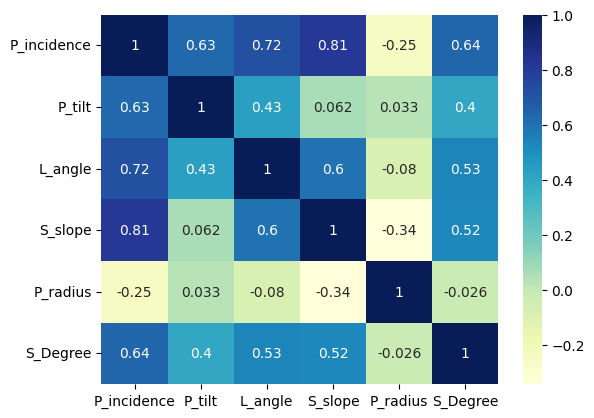

In [ ]:
sns.heatmap(data=d.corr(numeric_only=True), annot=True, cmap='YlGnBu');

### B. Share insights on correlation

A. Features having stronger correlation with correlation value.

- P_incidence is highly correlated to P_tilt, L_angle, S_slope and S_Degree.

B. Features having weaker correlation with correlation value.

- P_radius has very weak correlation with most of the features.
- P_tilt is weakly related to S_slope and P_radius

### C. Visualize a pairplot with 3 classes distinguished by colors and share insights.

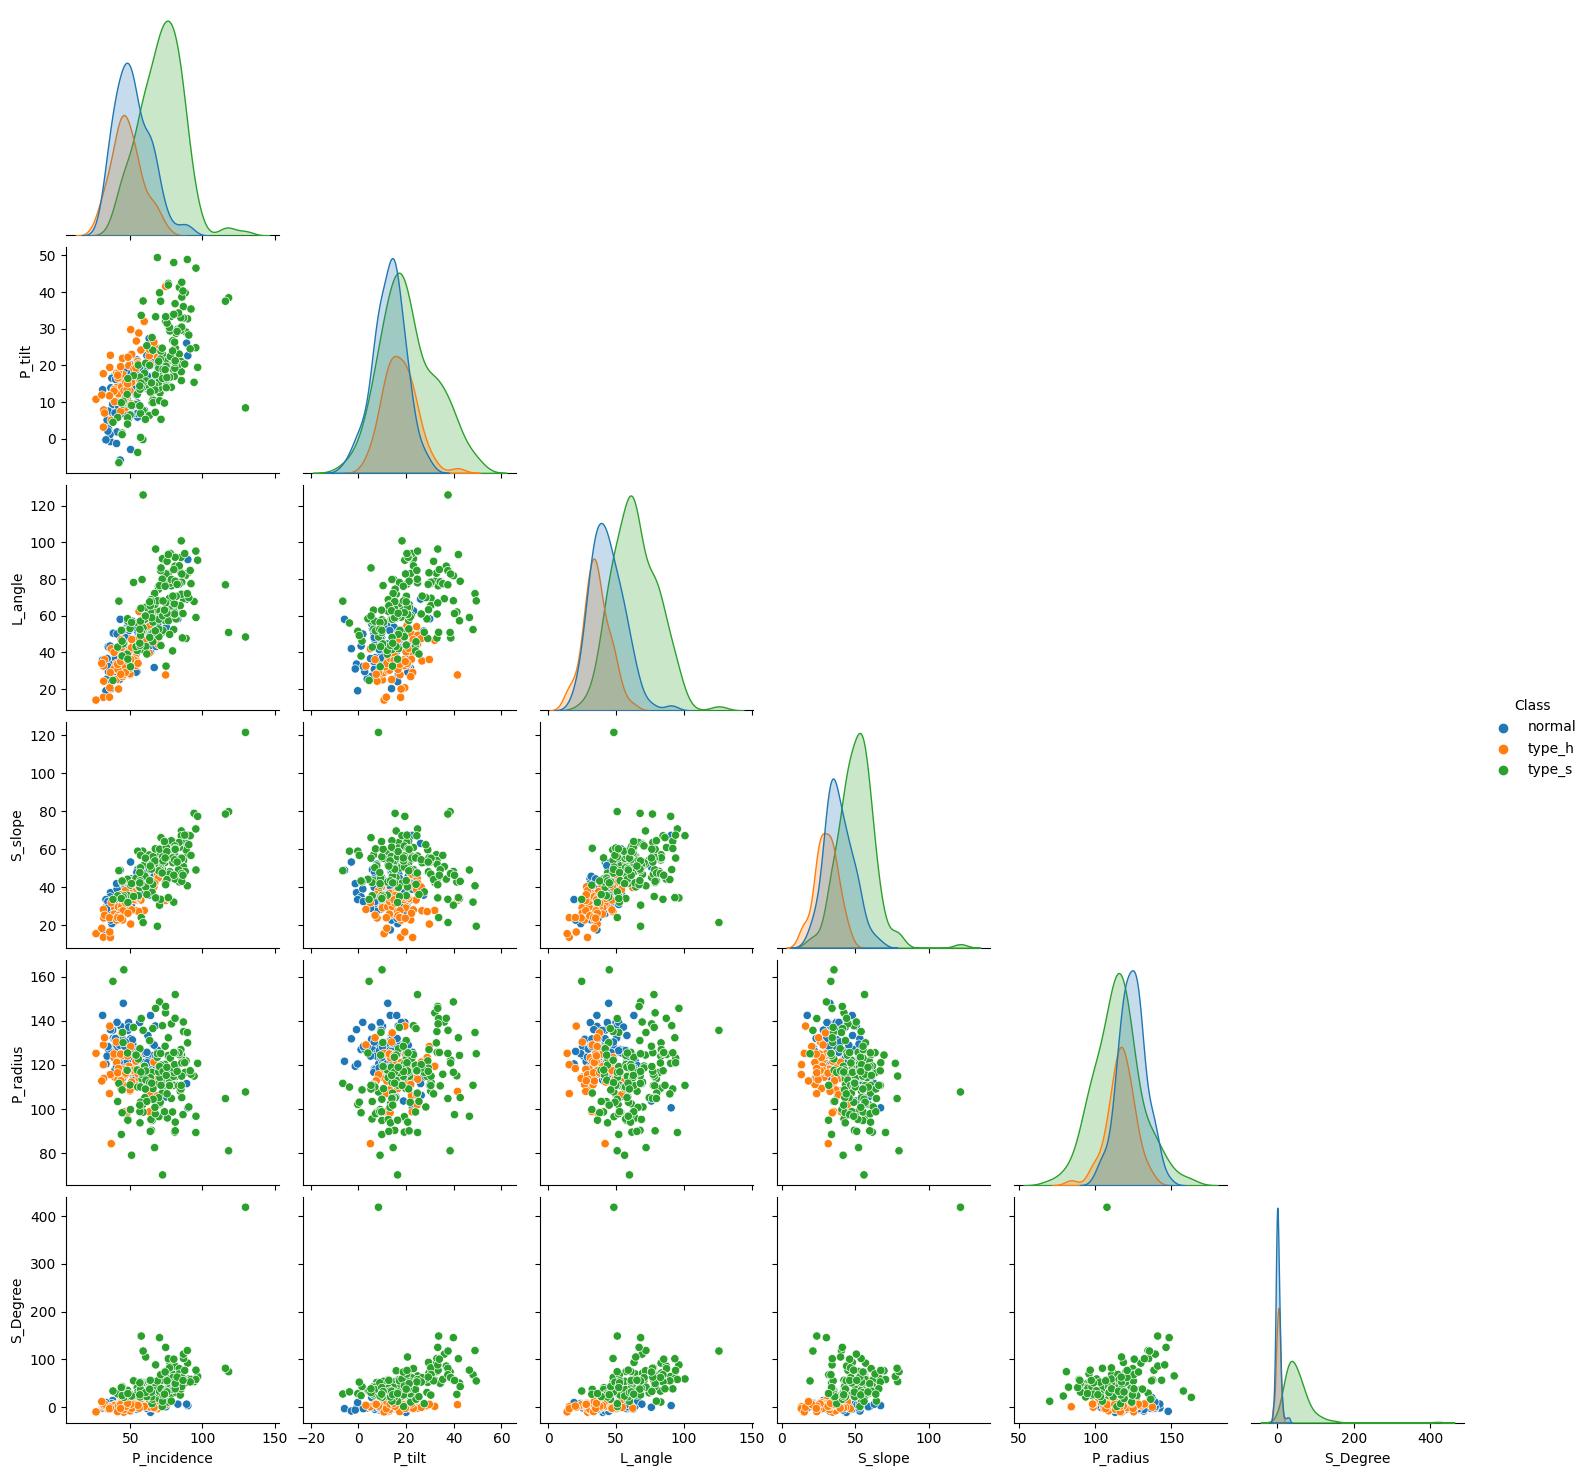

In [ ]:
sns.pairplot(data=d, hue='Class', corner=True);

- P_incidence data is normally distributed for Normal and type_h class. For type_s class the data is slightly left skewed.
- There is high positive correlation between P_incidence and S_Slope, L_Angle.
- There is high positive correlation between L_angle and S_slope
- Values for all parameters for type_s class have higher values compred to other 2 classes.

### D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.

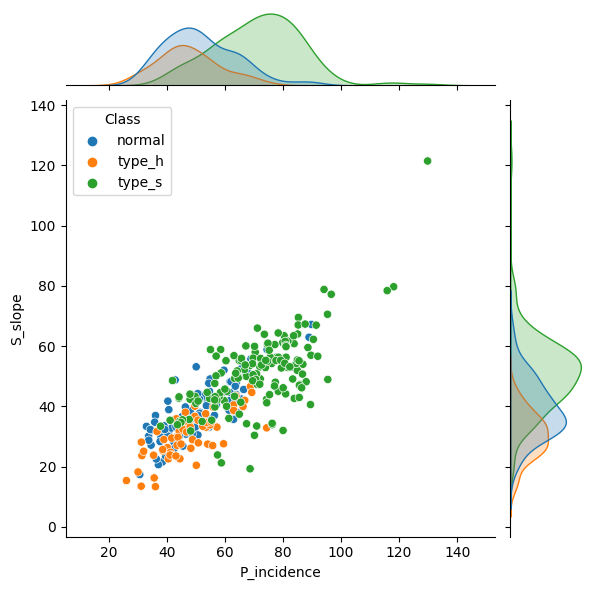

In [ ]:
sns.jointplot(data=d, x='P_incidence', y='S_slope', hue='Class');

- P_incidence and S_slope has high positive correlation.
- Approximately, if S_slope > 55 and P_incidence > 70, it is mostly likely to belong to type_S

In [ ]:
d[(d.P_incidence > 70) & (d.S_slope > 55)].Class.value_counts()

type_s    45
normal     4
Name: Class, dtype: int64

### E. Visualize a boxplot to check distribution of the features and share insights.

<Axes: >

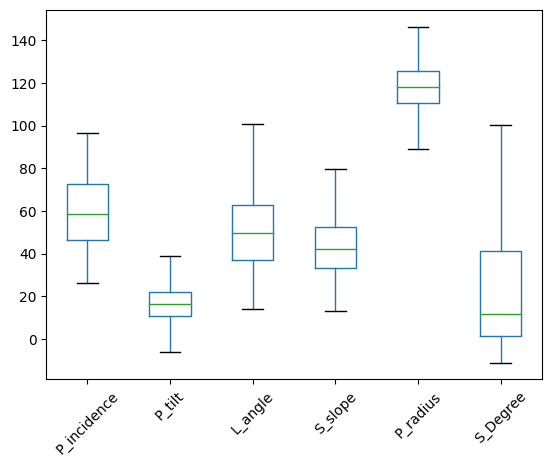

In [ ]:
d.boxplot(grid=False, rot=45, showfliers=False)

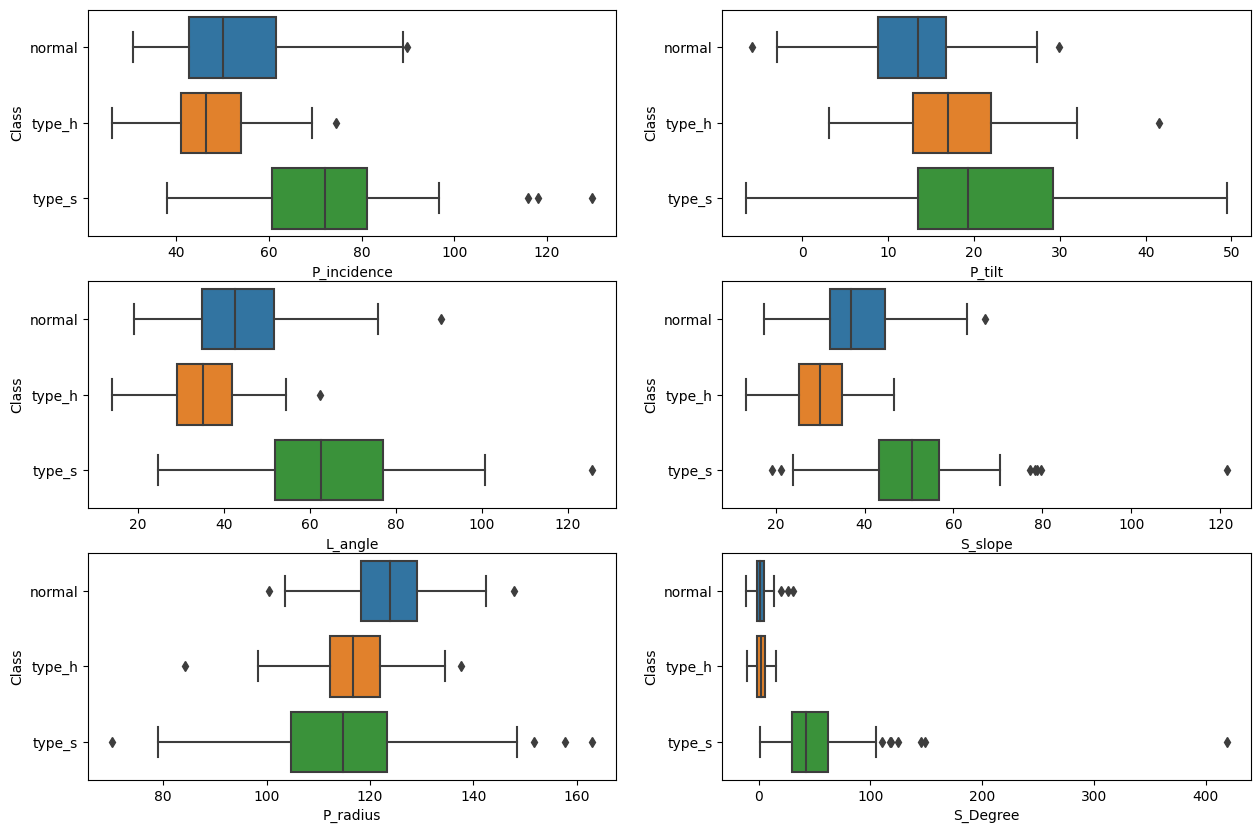

In [ ]:
f, ax = plt.subplots(3, 2, figsize=(15, 10))
index=0
for i in range(3):
  for j in range(2):
    col = d.columns[index]
    index += 1
    sns.boxplot(  x= col, data=d,  ax=ax[i,j], y='Class')

In [ ]:
import plotly.express as px

fig = px.box(d, x="S_Degree", y="Class", points="all")
fig.show()

For HTML - plotly graphs are not shown in HTML

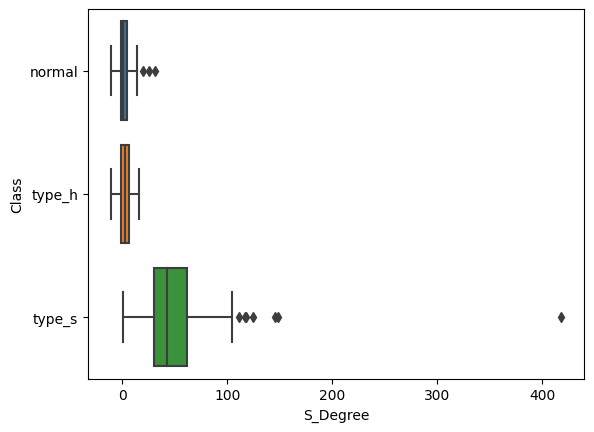

In [ ]:
sns.boxplot(data=d,x="S_Degree", y="Class");

- If S_Degree > 15, it is most likely to be a type_s class.

In [ ]:
d[d.S_Degree > 15].Class.value_counts()

type_s    145
normal      3
type_h      1
Name: Class, dtype: int64

## 4. Model Building:

### A. Split data into X and Y

In [ ]:
X = d.iloc[:,:-1]
y = d.iloc[:,-1]

NameError: ignored

In [ ]:
# from scipy.stats import zscore

# X  = X.apply(zscore)

### B. Split data into train and test with 80:20 proportion.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Verify the distribution of data

print(d.Class.value_counts(normalize=True).round(2),"\n")
print(y_train.value_counts(normalize=True).round(2),"\n")
print(y_test.value_counts(normalize=True).round(2))

type_s    0.48
normal    0.32
type_h    0.19
Name: Class, dtype: float64 

type_s    0.47
normal    0.33
type_h    0.20
Name: Class, dtype: float64 

type_s    0.53
normal    0.29
type_h    0.18
Name: Class, dtype: float64


### C. Train a Supervised Learning Classification base model using KNN classifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier(n_neighbors= 6 , weights = 'distance' )
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

# 0.87096 - K = 6

0.8709677419354839

### D. Print all the possible performance metrics for both train and test data.

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print(classification_report(y_test, predicted_labels))
print("* " * 30,"\n\n","Accuracy : ",metrics.accuracy_score(y_test, predicted_labels))

              precision    recall  f1-score   support

      normal       0.76      0.89      0.82        18
      type_h       0.80      0.73      0.76        11
      type_s       0.97      0.91      0.94        33

    accuracy                           0.87        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.88      0.87      0.87        62

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * *  

 Accuracy :  0.8709677419354839


In [ ]:
from sklearn import metrics

print("Confusion Matrix")
# print(metrics.confusion_matrix(y_test, predicted_labels))
pd.crosstab(y_test, predicted_labels)

Confusion Matrix


col_0,normal,type_h,type_s
Class,,,
normal,16,1,1
type_h,3,8,0
type_s,2,1,30


## 5. Performance Improvement:

### A. Experiment with various parameters to improve performance of the base model.

In [ ]:
import plotly.express as px
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

fig = px.line(x=range(1,50), y=scores, width=600, height=300)
fig.show()

For HTML

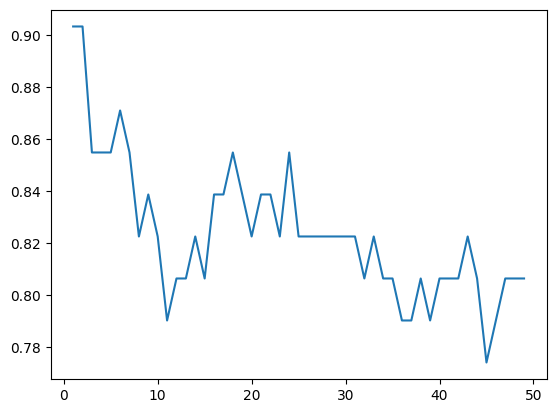

In [ ]:
sns.lineplot(x=range(1,50), y=scores, errorbar=('ci', False));

In [ ]:
# Misclassified data points

idx = np.where(y_test != predicted_labels)
d.iloc[idx]

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,normal
26,61.821627,13.597105,64.000000,48.224523,121.779803,1.296191,normal
33,34.649922,7.514783,43.000000,27.135140,123.987741,-4.082938,normal
50,54.142408,11.935110,43.000000,42.207298,122.209083,0.153549,normal
53,33.788843,3.675110,25.500000,30.113733,128.325356,-1.776111,normal
57,52.862214,9.410372,46.988052,43.451842,123.091240,1.856659,normal
58,57.145851,16.489091,42.842148,40.656760,113.806178,5.015186,normal


### B. Clearly showcase improvement in performance achieved.

**Using GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X,y)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 25


Summary:
- p = 2 mwans Eucleadian Distance which is the default distance measure for KNN.
- From the above score plot, the accuracy of the model with K = 25, is 0.82.
- It is less than accuracy of 0.87 with k = 6

### C. Clearly state which parameters contributed most to improve model performance.

- K = 6, gives the highest accuracy of 0.87%

**Using k-Fold Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

k_range=range(1,31)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

print(f"Maximum accuracy({max(k_scores)}) is for K = {k_scores.index(max(k_scores))+1}\n")
print(pd.DataFrame({"Score":k_scores}, index=k_range))

Maximum accuracy(0.8516129032258064) is for K = 25

       Score
1   0.835484
2   0.796774
3   0.809677
4   0.809677
5   0.838710
6   0.832258
7   0.838710
8   0.835484
9   0.829032
10  0.825806
11  0.829032
12  0.829032
13  0.835484
14  0.829032
15  0.832258
16  0.832258
17  0.832258
18  0.832258
19  0.835484
20  0.841935
21  0.841935
22  0.838710
23  0.848387
24  0.838710
25  0.851613
26  0.838710
27  0.838710
28  0.832258
29  0.835484
30  0.829032


In [ ]:
import plotly.express as px

fig = px.line(x=k_range, y=k_scores, width=600, height=300)
fig.show()

For HTML

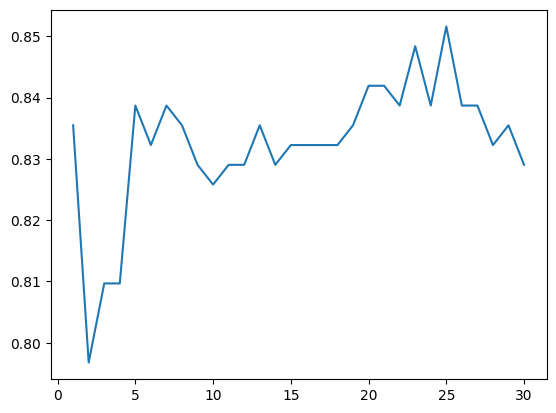

In [ ]:
sns.lineplot(x=k_range, y=k_scores, errorbar=('ci', False));

For K=25, accuracy is maximum (0.85 %)

# Part B

## 1. Data Understanding and Preparation

### A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [ ]:
d1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_Data/Data1.csv")
d2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_Data/Data2.csv")

### B. Print shape and Column Names and DataTypes of both the Dataframes.

In [ ]:
print("Data1 shape : ",d1.shape, " Data2 shape : ", d2.shape, "\n")
print("Data1 : \n", d1.dtypes)
print("\nData2 : \n", d2.dtypes)

Data1 shape :  (5000, 8)  Data2 shape :  (5000, 7) 

Data1 : 
 ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

Data2 : 
 ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


### C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [ ]:
d = pd.merge(d1,d2, how='inner', on='ID')
d.shape

(5000, 14)

In [ ]:
d.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [ ]:
d.isnull().any()

ID                     False
Age                    False
CustomerSince          False
HighestSpend           False
ZipCode                False
HiddenScore            False
MonthlyAverageSpend    False
Level                  False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard              True
dtype: bool

### D. Change Datatype of below features to ‘Object’
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.


In [ ]:
for c in ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']:
  d[c] = d[c].astype(object)

d.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

## 2. Data Exploration and Analysis:

### A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

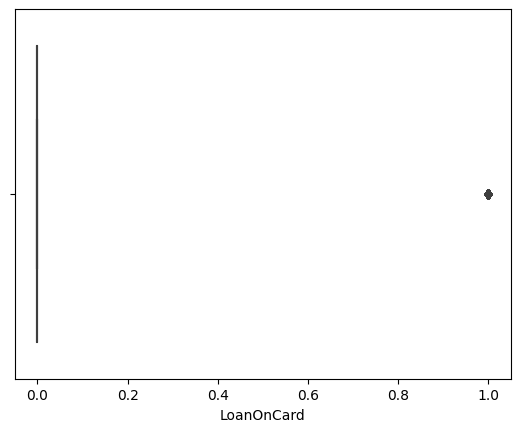

In [ ]:
sns.boxplot(data=d, x='LoanOnCard');

In [ ]:
print(d.LoanOnCard.value_counts())
print(d.LoanOnCard.value_counts(normalize=True).round(4) * 100)

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64
0.0    90.36
1.0     9.64
Name: LoanOnCard, dtype: float64


As stated in the problem statement, the conversion rate, depositors to borrowers, is single digit (9.64 %)

### B. Check the percentage of missing values and impute if required.

In [ ]:
d.isnull().any()

ID                     False
Age                    False
CustomerSince          False
HighestSpend           False
ZipCode                False
HiddenScore            False
MonthlyAverageSpend    False
Level                  False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard              True
dtype: bool

In [ ]:
d.LoanOnCard.value_counts(dropna=False)

0.0    4500
1.0     480
NaN      20
Name: LoanOnCard, dtype: int64

In [ ]:
d[d.LoanOnCard.isnull()]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
79,80,50,26,19,94720,2,0.4,1,118,0,0,1,0,NaN


Let us replace all NaN values with zero

In [ ]:
d.LoanOnCard.fillna(0,inplace=True)
d.LoanOnCard.value_counts(dropna=False)

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

### C. Check for unexpected values in each categorical variable and impute with best suitable value.
[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]

In [ ]:
d.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [ ]:
for c in ['HiddenScore', 'Level', 'Security','FixedDepositAccount', 'InternetBanking', 'CreditCard']:
  print("\n", c, "\n", d[c].value_counts())


 HiddenScore 
 1    1472
2    1296
4    1222
3    1010
Name: HiddenScore, dtype: int64

 Level 
 1    2096
3    1501
2    1403
Name: Level, dtype: int64

 Security 
 0    4478
1     522
Name: Security, dtype: int64

 FixedDepositAccount 
 0    4698
1     302
Name: FixedDepositAccount, dtype: int64

 InternetBanking 
 1    2984
0    2016
Name: InternetBanking, dtype: int64

 CreditCard 
 0    3530
1    1470
Name: CreditCard, dtype: int64


In [ ]:
for c in ['Age', 'CustomerSince', 'HighestSpend', 'ZipCode']:
  print("\n", c, "\n", d[c].value_counts())


 Age 
 35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: Age, dtype: int64

 CustomerSince 
  32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3   

- "**CustomerSince**" has negative values -1,-2, -3
- Need to impute the values

In [ ]:
d[d.CustomerSince <= 0]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,1,0.0
105,106,24,0,35,94704,3,0.10,2,0,1,0,1,0,0.0
151,152,26,0,132,92834,3,6.50,3,0,0,0,0,1,1.0
155,156,24,0,60,94596,4,1.60,1,0,0,0,1,0,0.0
156,157,26,0,15,92131,4,0.40,1,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,4902,26,0,54,96094,3,1.10,2,0,0,0,1,0,0.0
4934,4935,26,0,85,93950,2,1.60,3,0,0,0,1,1,0.0
4943,4944,26,0,12,96003,1,0.10,2,0,0,0,1,0,0.0
4957,4958,29,-1,50,95842,2,1.75,3,0,0,0,0,1,0.0


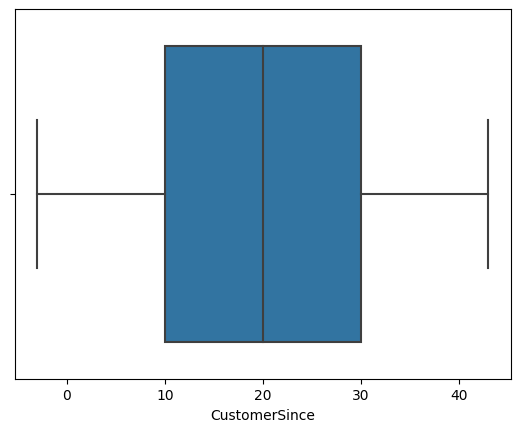

In [ ]:
sns.boxplot(data=d, x='CustomerSince');

In [ ]:
print("Mean : ", d.CustomerSince.mean(), " Median : ", d.CustomerSince.median())

Mean :  20.1046  Median :  20.0


In [ ]:
d[d.CustomerSince < 0 ] = d.CustomerSince.median()

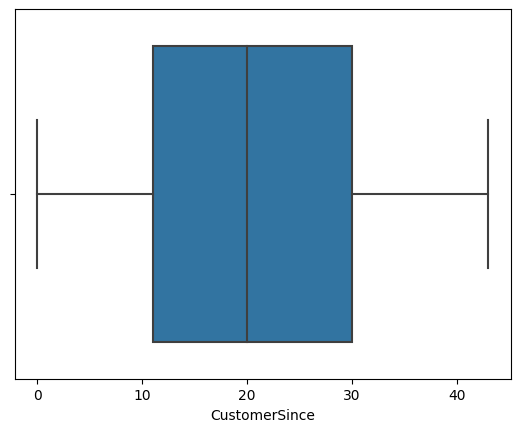

In [ ]:
sns.boxplot(data=d, x='CustomerSince');

## 3. Data Preparation and model building

### A. Split data into X and Y.
[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

In [ ]:
d.drop(['ID', 'ZipCode'], axis=1, inplace=True)
d.shape

(5000, 12)

In [ ]:
from sklearn.model_selection import train_test_split

X = d.iloc[:,:-1]
y = d.iloc[:,-1]

### B. Split data into train and test. Keep 25% data reserved for testing.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
print(d.LoanOnCard.value_counts(normalize=True).round(2),"\n")
print(y_train.value_counts(normalize=True).round(2),"\n")
print(y_test.value_counts(normalize=True).round(2))

0.0     0.89
1.0     0.10
20.0    0.01
Name: LoanOnCard, dtype: float64 

0.0     0.89
1.0     0.09
20.0    0.01
Name: LoanOnCard, dtype: float64 

0.0     0.89
1.0     0.10
20.0    0.01
Name: LoanOnCard, dtype: float64


### C. Train a Supervised Learning Classification base model - Logistic Regression.

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

### D. Print evaluation metrics for the model and clearly share insights.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))
print("* " * 30,"\n\n","Accuracy : ",metrics.accuracy_score(y_test, y_predict))   #0.9448

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1114
         1.0       0.83      0.59      0.69       129
        20.0       1.00      1.00      1.00         7

    accuracy                           0.94      1250
   macro avg       0.93      0.86      0.89      1250
weighted avg       0.94      0.94      0.94      1250

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * *  

 Accuracy :  0.9448


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

# Add polunomial features to the dataset
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(X)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_poly, y, test_size=0.30, random_state=1)

# Get the most important features using Lasso technique
lasso = Lasso(alpha=0.1, tol=0.01)
lasso.fit(x_train1,y_train1)
idx1 = np.where(lasso.coef_ != 0)

# Extract only the important features from the transformed dataset
p = pd.DataFrame(X_poly)
df2 = p.iloc[:,list(idx1)[0]]

# Apply Logistic Regression
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2, y, test_size=0.25, random_state=1)
model = LogisticRegression(solver="liblinear", tol=0.001)
model.fit(x_train2, y_train2)
print("Accuracy :", model.score(x_test2,y_test2))    # 0.9752

Accuracy : 0.9752


### E. Balance the data using the right balancing technique.
- i. Check distribution of the target variable
- ii. Say output is class A : 20% and class B : 80%
- iii. Here you need to balance the target variable as 50:50.
- iv. Try appropriate method to achieve the same

In [ ]:
d.LoanOnCard.value_counts()

0.0     4468
1.0      480
20.0      52
Name: LoanOnCard, dtype: int64

### F. Again train the same previous model on balanced data

In [ ]:
def LogisticTest(X_bal, y_bal):
  x_train, x_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.25, random_state=1)
  model = LogisticRegression(solver="liblinear")
  model.fit(x_train, y_train)
  print("\nAccuracy : ",model.score(x_test,y_test))

def PrintDataShape(y_new):
  print('Original dataset shape', Counter(y))
  print('Resample dataset shape', Counter(y_new))

1. Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()
x_bal, y_bal = smote.fit_resample(X, y)
PrintDataShape(y_bal)
LogisticTest(x_bal, y_bal)

Original dataset shape Counter({0.0: 4468, 1.0: 480, 20.0: 52})
Resample dataset shape Counter({0.0: 4468, 1.0: 4468, 20.0: 4468})

Accuracy :  0.936436884512086


Random Under-Sampling With Imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
x_bal, y_bal = rus.fit_resample(X, y)
PrintDataShape(y_bal)
LogisticTest(x_bal, y_bal)

Original dataset shape Counter({0.0: 4468, 1.0: 480, 20.0: 52})
Resample dataset shape Counter({0.0: 52, 1.0: 52, 20.0: 52})

Accuracy :  0.8717948717948718


Random Over-Sampling With imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_bal, y_bal = ros.fit_resample(X, y)
PrintDataShape(y_bal)
LogisticTest(x_bal, y_bal)

Original dataset shape Counter({0.0: 4468, 1.0: 480, 20.0: 52})
Resample dataset shape Counter({0.0: 4468, 1.0: 4468, 20.0: 4468})

Accuracy :  0.9310653536257834


Under-Sampling: Tomek Links

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = RandomOverSampler(sampling_strategy='majority')
x_bal, y_bal = ros.fit_resample(X, y)
PrintDataShape(y_bal)
LogisticTest(x_bal, y_bal)

Original dataset shape Counter({0.0: 4468, 1.0: 480, 20.0: 52})
Resample dataset shape Counter({0.0: 4468, 1.0: 4468, 20.0: 4468})

Accuracy :  0.9310653536257834


NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
x_bal, y_bal = nm.fit_resample(X, y)
PrintDataShape(y_bal)
LogisticTest(x_bal, y_bal)

Original dataset shape Counter({0.0: 4468, 1.0: 480, 20.0: 52})
Resample dataset shape Counter({0.0: 52, 1.0: 52, 20.0: 52})

Accuracy :  1.0


The accuracy is 100 %. So let us try a variation in NearMiss technique

In [ ]:
x_bal, y_bal = nm.fit_resample(x_train, y_train)
PrintDataShape(y_bal)

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_bal, y_bal, test_size=0.25, random_state=1)
model = LogisticRegression(solver="liblinear")
model.fit(x_train1, y_train1)
print("\nAccuracy on balanced data: ",model.score(x_test1,y_test1))

print("\nAccuracy on original data: ",model.score(x_test,y_test))

Original dataset shape Counter({0.0: 4468, 1.0: 480, 20.0: 52})
Resample dataset shape Counter({0.0: 45, 1.0: 45, 20.0: 45})

Accuracy on balanced data:  1.0

Accuracy on original data:  0.4456


Conclusion: The accuracy of 100% may be because of very less sampling data.

Penalize Algorithms (Cost-Sensitive Training)

In [ ]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
svc_model.fit(x_train, y_train)
print("\nAccuracy : ",model.score(x_test,y_test))


Accuracy :  0.4456


### G. Print evaluation metrics and clearly share differences observed.

**Note**
- Balancing techniques have not surpassed the achived accuracy rate of **97.52%**

## 4. Performance Improvement:

### A. Train a base model each for SVM, KNN.

In [ ]:
from sklearn import svm

clf = svm.SVC(gamma=0.025, C=2)
clf.fit(x_train , y_train)
clf.score(x_test,y_test)

0.9208

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(x_train, y_train)
NNH.score(x_test, y_test)

0.9104

In [ ]:
import plotly.express as px
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))

fig = px.line(x=range(1,50), y=scores, width=600, height=300)
fig.show()

For HTMLdtdt
dtdtfgjkk

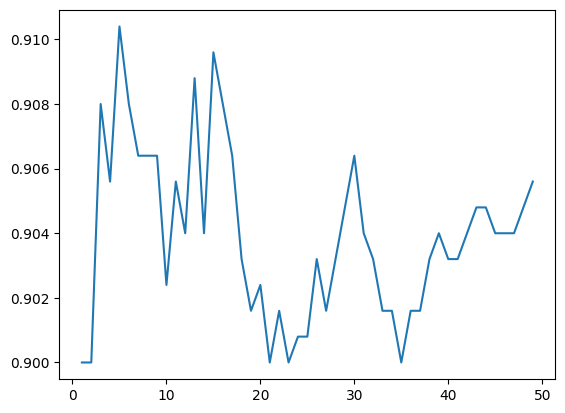

In [ ]:
sns.lineplot(x=range(1,50), y=scores, errorbar=('ci', False));

### B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks]
(Optional: Experiment with various Hyperparameters - Research required)

In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
gamma = [0.0001,0.001,0.1,1,10]
C = [0.001,0.01,1,10,100]

#Convert to dictionary
hyperparameters = dict(gamma = gamma, C = C)

#Create new KNN object
sv = svm.SVC()

#Use GridSearch
clf = GridSearchCV(sv, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X,y)

print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best gamma: 0.0001
Best C: 100


In [ ]:
clf = svm.SVC(gamma=0.0001, C=100)
clf.fit(x_train , y_train)
clf.score(x_test,y_test)

0.9512

**Note**
- gamma = 0.0001 and C=100, gives the maximum accuracy of **95.12 %**

### C. Print evaluation metrics for final model

In [ ]:
y_predict = clf.predict(x_test)
print(classification_report(y_test, y_predict))
print("* " * 30,"\n\n","Accuracy : ",metrics.accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1114
         1.0       0.83      0.67      0.74       129
        20.0       1.00      1.00      1.00         7

    accuracy                           0.95      1250
   macro avg       0.93      0.88      0.90      1250
weighted avg       0.95      0.95      0.95      1250

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * *  

 Accuracy :  0.9512


### D. Share improvement achieved from base model to final model.

- The base model SVM (gamma = 0.025 and C=2) had accuracy of **92.08 %**
- After tuning the parameters (gamma = 0.0001 and C=100) the accuracy has increased to **95.12 %**
- With Logistic regression, the accuracy was **94.48 %**
- Maximum accuracy is achived (**97.52 %**) with Logistic regression with Polynomial features using Lasso technique